In [1]:
# https://www.openml.org/d/40536
# https://www.openml.org/d/32

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from experiment import Experiment
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
n_neighbors = np.arange(1, 32, 3) # 1,
metrics = ['euclidean', 'manhattan', 'chebyshev']
est_params = {'knn__n_neighbors': n_neighbors,
             'knn__metric': metrics,
             'knn__weights': ['uniform', 'distance']}

In [3]:
pipe1 = Pipeline(steps=[('scale', StandardScaler()), 
                       ('knn', KNeighborsClassifier())
                      ])
pipe2 = Pipeline(steps=[('scale', StandardScaler()), 
                        ('impute', SimpleImputer()),
                       ('knn', KNeighborsClassifier())
                      ])

In [4]:
pen_experiment = Experiment('K-NN', 32, 'Pen digits', pipe1, est_params, validationCurveParams=[
    ('knn__n_neighbors', 'K', 'linear')
], reshape=False, multiplot_params=('knn__metric', ['euclidean', 'manhattan', 'chebyshev']))

dating_experiment = Experiment('K-NN', 40536, 'Speed Dating', pipe2, est_params, validationCurveParams=[
    ('knn__n_neighbors', 'K', 'linear')
], reshape=False, multiplot_params=('knn__metric', ['euclidean', 'manhattan', 'chebyshev']))

knn_experiments = {'pen': pen_experiment, 'date': dating_experiment}

In [5]:
pen_experiment.run()
dating_experiment.run()

K-NN on Pen digits training took 0:00:46.059211
K-NN on Pen digits Test Score: 0.9945414847161572
K-NN on Speed Dating training took 0:08:36.740933
K-NN on Speed Dating Test Score: 0.831980906921241


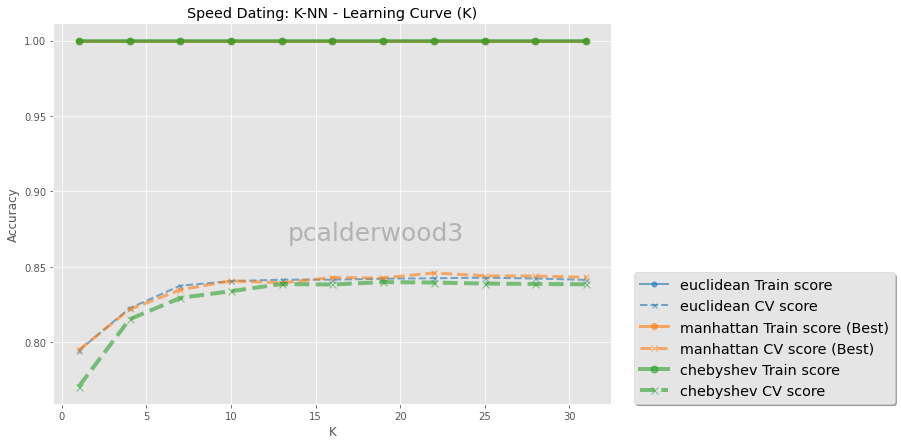

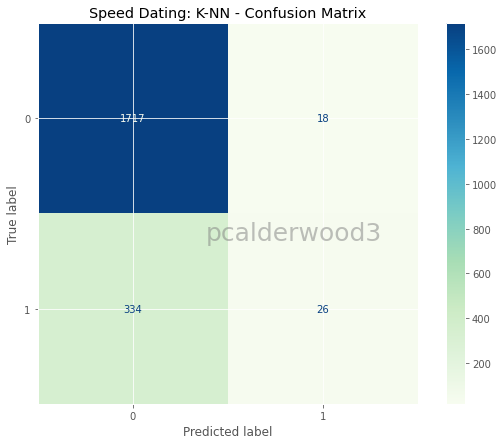

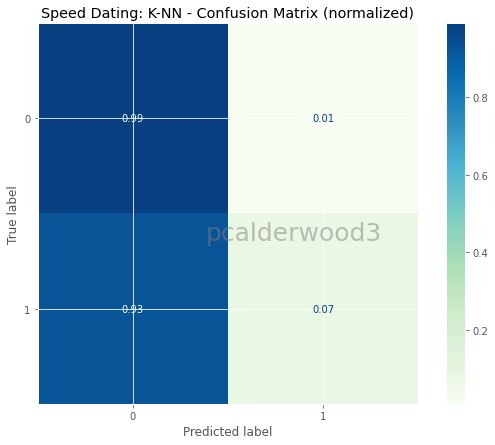

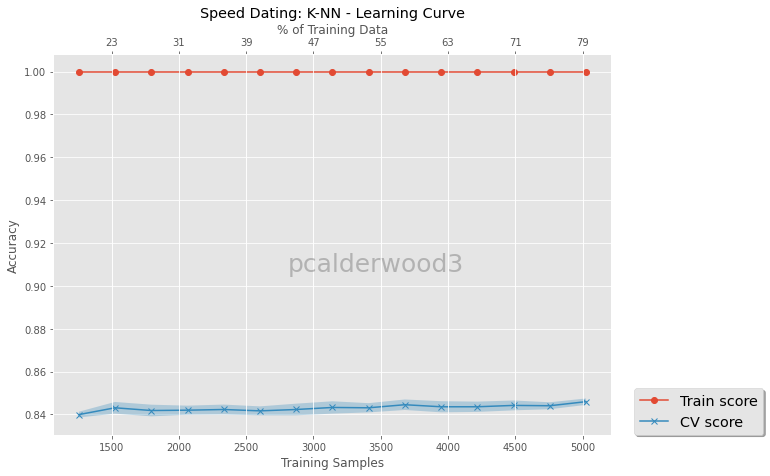

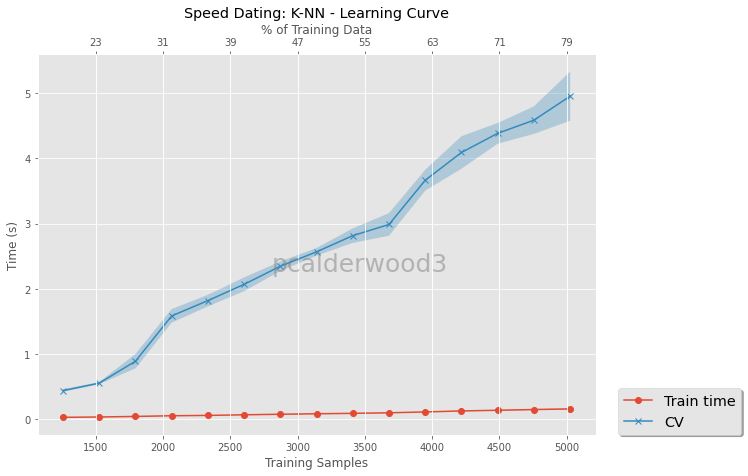

Best parameters took 0:00:00.193219 to train


In [6]:
dating_experiment.plotValidation()
dating_experiment.plotConfusion()
dating_experiment.plotLearningCurve()
dating_experiment.measureFitTime()

In [7]:
print(f'Top 5 params for {dating_experiment.datasetName} using {dating_experiment.leanerName}')
for p in dating_experiment.topParams(5):
    print(p)

Top 5 params for Speed Dating using K-NN
(0.8459332198288312, {'knn__metric': 'manhattan', 'knn__n_neighbors': 22, 'knn__weights': 'distance'})
(0.8440241653112001, {'knn__metric': 'manhattan', 'knn__n_neighbors': 25, 'knn__weights': 'distance'})
(0.8438648029632783, {'knn__metric': 'manhattan', 'knn__n_neighbors': 28, 'knn__weights': 'distance'})
(0.8430686246193291, {'knn__metric': 'manhattan', 'knn__n_neighbors': 31, 'knn__weights': 'distance'})
(0.8429101490253308, {'knn__metric': 'manhattan', 'knn__n_neighbors': 16, 'knn__weights': 'distance'})


K-NN on Pen digits training took 0:00:37.454934
K-NN on Pen digits Test Score: 0.9945414847161572


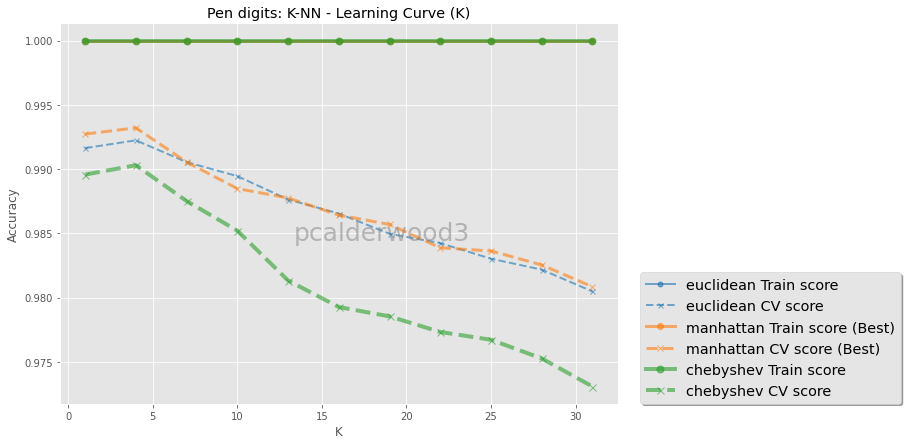

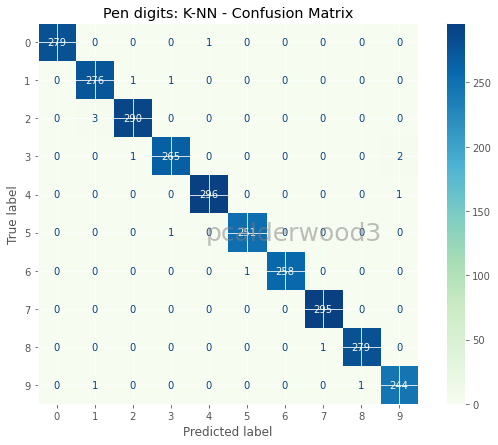

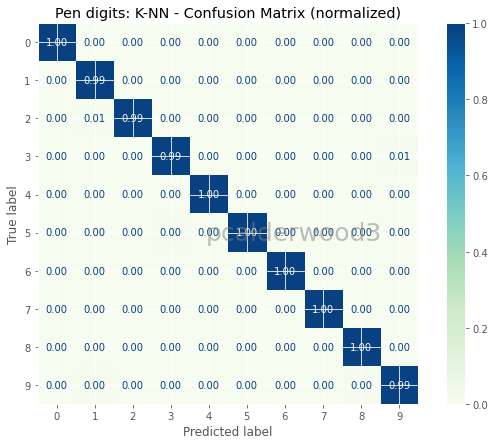

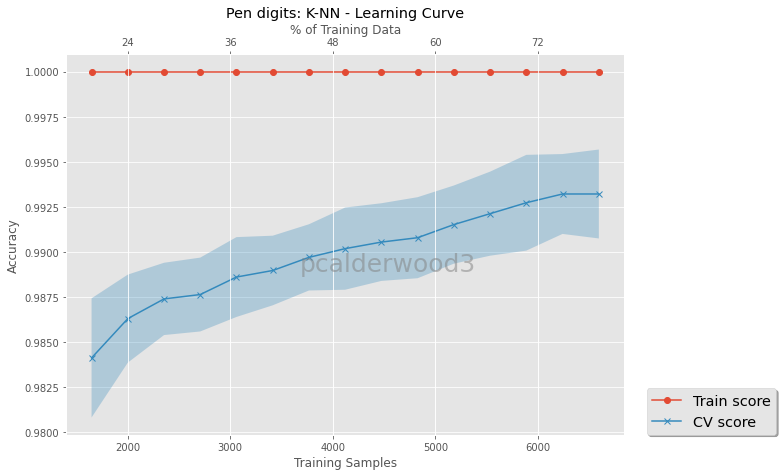

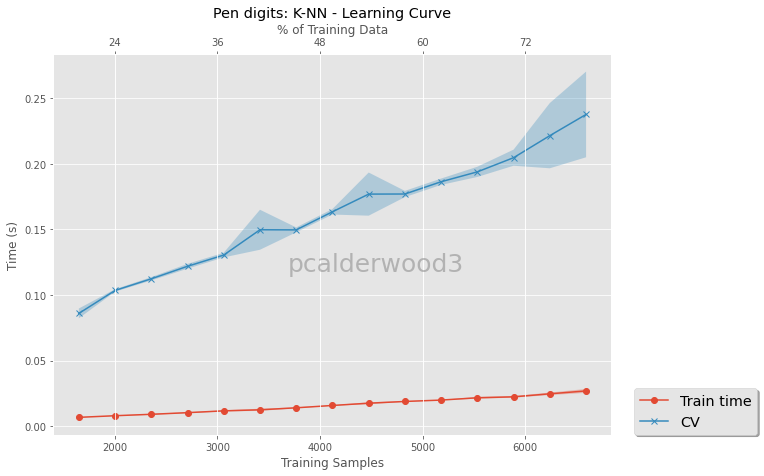

Best parameters took 0:00:00.033423 to train


In [8]:
pen_experiment.run()
pen_experiment.plotValidation()
pen_experiment.plotConfusion()
pen_experiment.plotLearningCurve()
pen_experiment.measureFitTime()

In [9]:
print(f'Top 5 params for {pen_experiment.datasetName} using {pen_experiment.leanerName}')
for p in pen_experiment.topParams(5):
    print(p)

Top 5 params for Pen digits using K-NN
(0.9932072688949466, {'knn__metric': 'manhattan', 'knn__n_neighbors': 4, 'knn__weights': 'distance'})
(0.9927221263843341, {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'distance'})
(0.9927221263843341, {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'})
(0.9922369102780738, {'knn__metric': 'euclidean', 'knn__n_neighbors': 4, 'knn__weights': 'distance'})
(0.992236836682426, {'knn__metric': 'euclidean', 'knn__n_neighbors': 4, 'knn__weights': 'uniform'})
